In [5]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from matplotlib import gridspec

from hdf5_dataset import HDF5Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

18.663801 0
6.498959 0
17.692844 1
6.8712516 1
17.526405 2
6.6645594 2
19.424204 3
6.897543 3
17.710047 4
6.7480474 4
17.844126 5
7.0390477 5
18.333378 6
6.699093 6
18.005695 7
6.8786955 7
17.693117 8
5.974608 8
17.776527 9
6.4142804 9
17.169085 10
6.4441495 10
17.510069 11
6.5955524 11
17.901209 12
6.5008626 12
18.123446 13
6.352556 13
18.427822 14
6.962364 14
17.793596 15
6.266145 15
17.928411 16
6.5263457 16
19.12113 17
6.6470494 17
17.376114 18
6.9790635 18
18.154041 19
6.386187 19
17.896881 20
6.6723566 20
17.935425 21
6.4123955 21
17.345879 22
6.822393 22
17.916155 23
6.62416 23
18.200455 24
6.5416327 24
18.426191 25
6.7504277 25
17.832798 26
5.9781256 26
18.467607 27
6.247662 27
18.306547 28
6.953581 28
17.245504 29
5.158006 29
17.426298 30
6.4418154 30
17.914202 31
6.8424006 31
17.577377 32
6.799813 32
17.85013 33
6.8173776 33
17.48805 34
6.478358 34
17.473024 35
6.391769 35


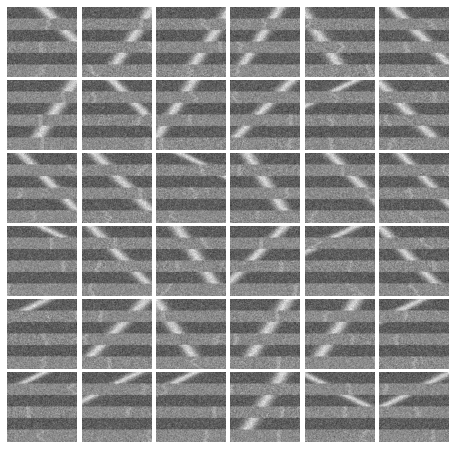

In [2]:
plt.subplots(6, 6, figsize=(8, 8))
h5_filename = '/datax/scratch/zelakiewicz/synthetic_30000_6_band.h5'
data_name = 'noisy_'
hf = h5py.File(h5_filename, 'r')
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0, hspace=0.05)
for i in range(36):    
    lb = np.random.choice([1,2,3,4,5,6])
    arr = np.array(hf.get(data_name+str(i+1)+'_'+str(lb))['data'])
    print(np.amax(arr),i)
    print(np.amin(arr), i)
    waterfall = np.flip(arr.reshape(128,128),1)
    plt.subplot(gs1[i])
    plt.imshow(waterfall, cmap = 'gray', vmin=6, vmax=17)  
    plt.axis('off') 
hf.close()

In [6]:
# dataset preparation
def load_dataset(batch_size = 512, path = "/datax/scratch/zelakiewicz/"):
    dataset = HDF5Dataset(file_path=path , recursive=False, load_data=True, transform=transforms.ToTensor())

    train_dataset, test_dataset = random_split(dataset, [25000, 5000])
   
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=8, pin_memory=True)
    return train_loader, test_loader

In [9]:
train, test = load_dataset()

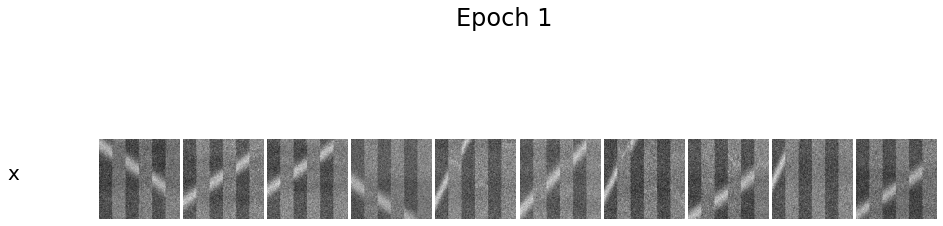

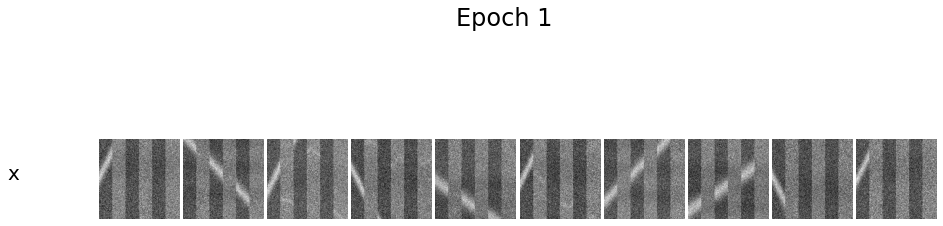

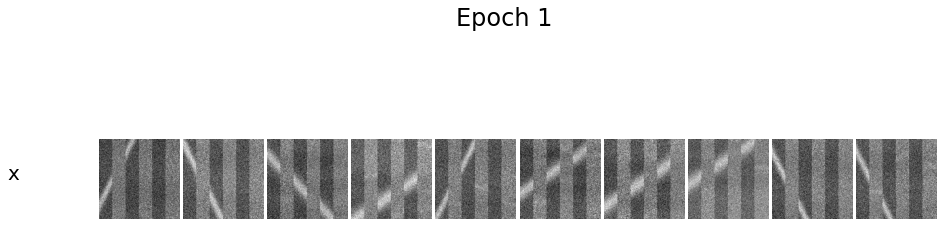

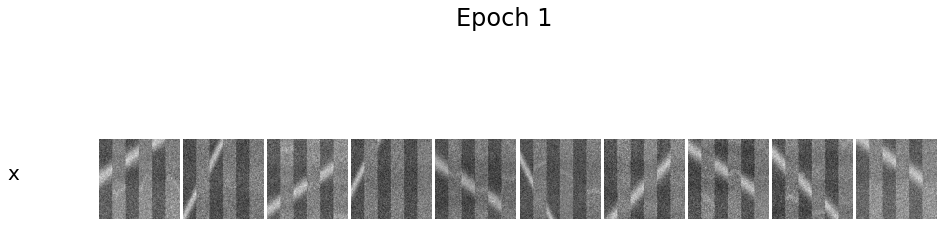

KeyboardInterrupt: 

In [18]:
for epoch in range(400):
    
    for i, (images, labels) in enumerate(train):
        images = F.normalize(images, p=2,dim=2)
        images = images.reshape(images.size(0),-1)
        n_show = 10
        real = images[:n_show]
        if i%5==0:
            c = torch.zeros(n_show, 6, dtype=torch.float32)
            c[torch.arange(n_show), labels[:n_show]] = 1
            z = torch.rand(n_show, 50)
            z = z

            real = real.reshape(n_show, 128, 128).numpy()

            fig, ax = plt.subplots(1, n_show, figsize=(15,5))
            fig.subplots_adjust(wspace=0.05, hspace=0)
            fig.suptitle('Epoch {}'.format(epoch+1))
            fig.text(0.04, 0.5, 'x', ha='left')

            for k in range(n_show):
                ax[k].imshow(real[k], cmap='gray')
                ax[k].axis('off')

            plt.show()

        # print(torch.min(images[0]), torch.max(images[0]))
        

In [20]:
abs(17329714-17475506)/17329714

0.008412833587444086